<a href="https://colab.research.google.com/github/rociocelestial/Challenge2-Data-Science/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [51]:
import requests
import pandas as pd

In [52]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)
# Convertir el contenido en un diccionario de Python
data = response.json()
# Lo transformo con pandas, este diccionario en un DataFrame, pero esto no sirve
# por esto hacemos
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [53]:
# por esto hacemos pd.json_normalize(data)
df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

**Verificación**

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

2.- Verificación de Valores Unicos

In [55]:
for col in df.columns:
  print(f"Valores unicos en la columna'{col}:{df[col].nunique()}'")

  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' *50)


Valores unicos en la columna'customerID:7267'
Valores unicos en la columna'Churn:3'
['No' 'Yes' '']
--------------------------------------------------
Valores unicos en la columna'customer.gender:2'
['Female' 'Male']
--------------------------------------------------
Valores unicos en la columna'customer.SeniorCitizen:2'
[0 1]
--------------------------------------------------
Valores unicos en la columna'customer.Partner:2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'customer.Dependents:2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'customer.tenure:73'
Valores unicos en la columna'phone.PhoneService:2'
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna'phone.MultipleLines:3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores unicos en la columna'internet.InternetService:3'
['DSL' 'Fiber optic' 'No']
--------

3.- Valores Duplicados

In [56]:
print('Números de duplicados', df.duplicated().sum())

Números de duplicados 0


4.- Valores Nulos

In [57]:
print('Núumeros nulos', df.isnull().sum())

Núumeros nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


5.- Valores Vacios o en Blanco

In [58]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


**Transformación**

1.- Cambiando la columna 'account.Charges.Total' para float

In [59]:
# from numpy import float64
# no es posible porque numpy solo convierte números no string (object)
# df['account.Charges.Total'].dtype(float64)
# vamos a cambiar valores vacios a valores nulos
df['account.Charges.Total'] = df['account.Charges.Total'].apply(pd.to_numeric, errors='coerce')
print(df['account.Charges.Total'].dtype)


float64


2.- Eliminación de valores vacios en la columna 'Churn'

In [60]:
df = df[df['Churn'].str.strip() != '']
print('Número de filas despues de eliminar los vacios en "Churn":', len(df))

Número de filas despues de eliminar los vacios en "Churn": 7043


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [62]:
df = df.dropna(subset= ['account.Charges.Total'])


In [63]:
print('Núumeros nulos', df.isnull().sum())

Núumeros nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


3.- Creando un nueva columna, llamada 'Cuentas diarias'

In [64]:
df['cuentas_diarias'] = df['account.Charges.Monthly']/30
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


4.- Cambiando el nombre a las columnas

In [65]:
columnas = {                                                        # Diccionario con los nuevos nombres de las columnas.
    'customerID': 'cliente_id',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'adulto_mayor',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'cargo_mensual',
    'account.Charges.Total': 'cargo_total'
}

df = df.rename(columns = columnas)
df

,cliente_id,Churn,genero,adulto_mayor,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [66]:
columnas_a_traducir = ['Churn', 'genero', 'posee_pareja','posee_dependientes','servicio_telefono','multiples_lineas',
                       'seguridad_online','backup_online','proteccion_dispositivo','soporte_tecnico','streaming_tv','streaming_peliculas',
                       'tipo_contrato','factura_digital']

mapeo = {'Yes':'Si', 'No':'No','Female':'Femenino','Male':'Masculino', 'No phone service': 'Sin servicio de telefono',
         'No internet service':'Sin servicio de internet','One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'}

for col in columnas_a_traducir:
  df[col] = df[col].replace(mapeo)



In [67]:
df

,cliente_id,Churn,genero,adulto_mayor,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Femenino,0,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Anual,Si,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,0,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mensual,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,0,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Mensual,Si,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Si,Masculino,1,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Mensual,Si,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,1,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Mensual,Si,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,No,No,13,Si,No,DSL,...,No,Si,No,No,Anual,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Si,Masculino,0,Si,No,22,Si,Si,Fiber optic,...,No,No,No,Si,Mensual,Si,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,0,No,No,2,Si,No,DSL,...,No,No,No,No,Mensual,Si,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,0,Si,Si,67,Si,No,DSL,...,Si,Si,No,Si,Bienal,No,Mailed check,67.85,4627.65,2.261667


In [68]:
df['adulto_mayor'] = df['adulto_mayor'].replace({1:'Si', 0:'No'})
df.head()

,cliente_id,Churn,genero,adulto_mayor,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Femenino,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Anual,Si,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mensual,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,No,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Mensual,Si,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Si,Masculino,Si,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Mensual,Si,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,Si,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Mensual,Si,Mailed check,83.9,267.40,2.796667


In [69]:
df['metodo_pago'] = df['metodo_pago'].replace({'Mailed check':'Cheque enviado por correo', 'Electronic check':'Cheque electrónico',
                                               'Credit card (automatic)':'Tarjeta de crédito (automático)',
                                               'Bank transfer (automatic)':'Transferencia bancaria (automática)'})
df.head()

,cliente_id,Churn,genero,adulto_mayor,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Femenino,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Anual,Si,Cheque enviado por correo,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mensual,No,Cheque enviado por correo,59.9,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,No,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Mensual,Si,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,Si,Masculino,Si,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Mensual,Si,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,Si,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Mensual,Si,Cheque enviado por correo,83.9,267.40,2.796667


In [70]:
df

,cliente_id,Churn,genero,adulto_mayor,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-ORFBO,No,Femenino,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,Anual,Si,Cheque enviado por correo,65.60,593.30,2.186667
1,0003-MKNFE,No,Masculino,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Mensual,No,Cheque enviado por correo,59.90,542.40,1.996667
2,0004-TLHLJ,Si,Masculino,No,No,No,4,Si,No,Fiber optic,...,Si,No,No,No,Mensual,Si,Cheque electrónico,73.90,280.85,2.463333
3,0011-IGKFF,Si,Masculino,Si,Si,No,13,Si,No,Fiber optic,...,Si,No,Si,Si,Mensual,Si,Cheque electrónico,98.00,1237.85,3.266667
4,0013-EXCHZ,Si,Femenino,Si,Si,No,3,Si,No,Fiber optic,...,No,Si,Si,No,Mensual,Si,Cheque enviado por correo,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,No,No,No,13,Si,No,DSL,...,No,Si,No,No,Anual,No,Cheque enviado por correo,55.15,742.90,1.838333
7263,9992-RRAMN,Si,Masculino,No,Si,No,22,Si,Si,Fiber optic,...,No,No,No,Si,Mensual,Si,Cheque electrónico,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Masculino,No,No,No,2,Si,No,DSL,...,No,No,No,No,Mensual,Si,Cheque enviado por correo,50.30,92.75,1.676667
7265,9993-LHIEB,No,Masculino,No,Si,Si,67,Si,No,DSL,...,Si,Si,No,Si,Bienal,No,Cheque enviado por correo,67.85,4627.65,2.261667


#📊 Carga y análisis

1.- Análisis descriptiva

In [71]:
df.describe()

,tiempo_contrato,cargo_mensual,cargo_total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159940
std,24.545260,30.085974,2266.771362,1.002866
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.587500,401.450000,1.186250
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995417
max,72.000000,118.750000,8684.800000,3.958333


2.- Distribución de la Evasión

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df['Churn'].unique()

array(['No', 'Si'], dtype=object)

In [74]:
conteo_si_churn = df['Churn'].value_counts().get('Si', 0)
print(f"Número de 'Si' en la columna 'Churn': {conteo_si_churn}")

Número de 'Si' en la columna 'Churn': 1869


In [75]:
conteo_no_churn = df['Churn'].value_counts().get('No', 0)
print(f"Número de 'No' en la columna 'Churn': {conteo_no_churn}")

Número de 'No' en la columna 'Churn': 5163


In [76]:
churn_counts = df['Churn'].value_counts()
churn_counts

,count
Churn,
No,5163
Si,1869


In [77]:
churn_porcentaje = df['Churn'].value_counts(normalize=True)*100
churn_porcentaje

,proportion
Churn,
No,73.421502
Si,26.578498


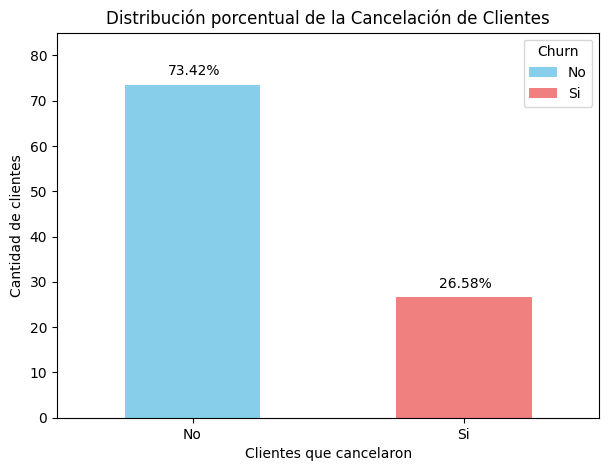

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Crear el gráfico de barras
plt.figure(figsize=(7,5))
ax = churn_porcentaje.plot(kind='bar', color=['skyblue', 'lightcoral'])

#
plt.title('Distribución porcentual de la Cancelación de Clientes')
plt.xlabel('Clientes que cancelaron')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.ylim(0,85)



# Añadir etiquetas de porcentaje en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(1, 10), textcoords='offset points', fontsize=10)

# Elimina lineas de la cuadricula
ax.grid(False)


# Crear elementos de leyenda personalizados
legend_elements = [
    Patch(facecolor='skyblue', label='No'),
    Patch(facecolor='lightcoral', label='Si')
]

# Añadir la leyenda al gráfico
ax.legend(handles=legend_elements, title="Churn")


plt.show()

###Podemos observar que el porcentaje de Clientes que dejaron la Empresa Telecomx es un porcentaje significativo que amerita hacer un análisis exhaustivo.

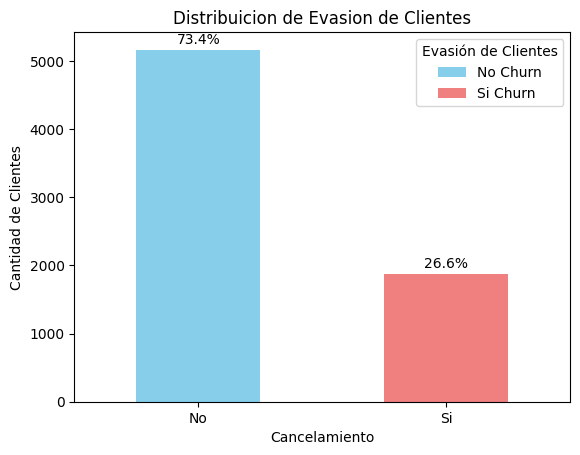

In [79]:

from matplotlib.patches import Patch

churn_counts = df['Churn'].value_counts()
churn_porcentaje = df['Churn'].value_counts(normalize=True)*100

# Crear el gráfico de barras con colores específicos
ax = churn_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribuicion de Evasion de Clientes')
plt.xlabel('Cancelamiento')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)

# Añadir etiquetas de porcentaje en las barras
for i, percentage in enumerate(churn_porcentaje):
    ax.text(i, churn_counts.iloc[i] + 50, f'{percentage:.1f}%', ha='center', va='bottom')

# Crear elementos de leyenda personalizados
legend_elements = [
    Patch(facecolor='skyblue', label='No Churn'),
    Patch(facecolor='lightcoral', label='Si Churn')
]

# Añadir la leyenda al gráfico
ax.legend(handles=legend_elements, title="Evasión de Clientes")

plt.show()

2.1 Distribución de la Evasión por Variables Categóricas: **Género**


In [80]:
import plotly.express as px

In [81]:
churn_genero = df.groupby('genero')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_genero)

Churn         No     Si
genero                 
Femenino   73.04  26.96
Masculino  73.80  26.20


<Figure size 1000x700 with 0 Axes>

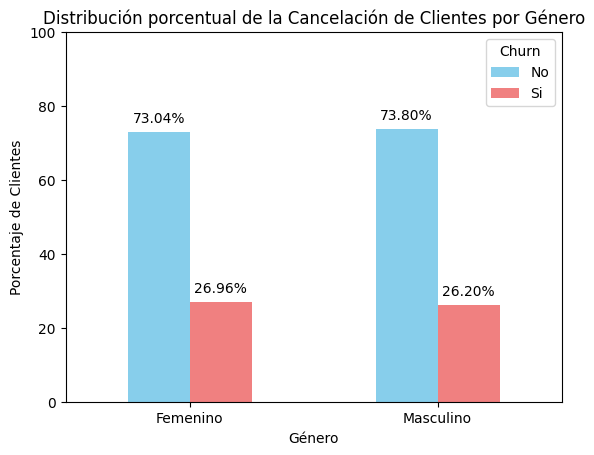

In [82]:
plt.figure(figsize=(10, 7))
ax = churn_genero.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribución porcentual de la Cancelación de Clientes por Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje de Clientes')
plt.xticks(rotation=0)
plt.ylim(0, 100) # Establecer el límite del eje y para acomodar los porcentajes

# Añadir etiquetas de porcentaje en las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black',
                xytext=(0,5), textcoords='offset points')

# Elimina lineas de la cuadricula
ax.grid(False)


# Crear elementos de leyenda personalizados
legend_elements = [
    Patch(facecolor='skyblue', label='No'),
    Patch(facecolor='lightcoral', label='Si')
]

# Añadir la leyenda al gráfico
ax.legend(handles=legend_elements, title="Churn")

plt.show()

###Esta información no es tan relevante para nuestro análisis

In [135]:
px.histogram(df, x='genero', text_auto=True, color='Churn', barmode='group').update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False
).show()

2.2 Distribución de la Evasión por Variables Categóricas: **Tipo de Contrato**


In [136]:
px.histogram(df, x= 'tipo_contrato', text_auto=True, color='Churn', barmode='group').update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False
).show()

In [85]:
churn_tipo_contrato = df.groupby('tipo_contrato')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_tipo_contrato)

Churn             No     Si
tipo_contrato              
Anual          88.72  11.28
Bienal         97.15   2.85
Mensual        57.29  42.71


In [86]:
import plotly.graph_objects as go

# Crear un gráfico de barras apiladas con Plotly Go
fig = go.Figure()

for col in churn_tipo_contrato.columns:
    fig.add_trace(go.Bar(
        x=churn_tipo_contrato.index,
        y=churn_tipo_contrato[col],
        name=f'Churn: {col}'
    ))

fig.update_layout(
    barmode='stack',
    title='Distribución Porcentual de la Evasión de Clientes por Tipo de Contrato',
    xaxis_title='Tipo de Contrato',
    yaxis_title='Porcentaje de Clientes',
    yaxis=dict(range=[0, 100]) # Asegurar que el eje Y vaya de 0 a 100%
)

# Añadir etiquetas de texto a las barras
for i, contract_type in enumerate(churn_tipo_contrato.index):
    total_height = 0
    for col in churn_tipo_contrato.columns:
        value = churn_tipo_contrato.loc[contract_type, col]
        fig.add_annotation(
            x=contract_type,
            y=total_height + value / 2, # Posición en el centro de la sección de la barra
            text=f'{value:.2f}%',
            showarrow=False,
            font=dict(color='black', size=14)
        )
        total_height += value

fig.show()

In [87]:
px.violin(df, x='tipo_contrato', y='tiempo_contrato', color='Churn')

In [88]:
px.histogram(df, x= 'tipo_contrato', text_auto=True, color='tiempo_contrato', barmode='group')

###Estos gráficos por Tipo de Contrato como: Mensual, Anual y Bienal,  nos permite observar, que los Clientes que tuvieron contrato Mensual, fueron los que más resincindieron contrato con la empresa Telecomx.

2.3 Distribución de la Evasión por Variables Categóricas:  **Tipo de Internet**

In [89]:
px.histogram(df, x ='tipo_internet', text_auto =True, color = 'Churn', barmode='group' )

In [90]:
churn_tipo_internet = df.groupby('tipo_internet')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_tipo_internet)

Churn             No     Si
tipo_internet              
DSL            81.00  19.00
Fiber optic    58.11  41.89
No             92.57   7.43


In [141]:

fig = px.bar(churn_tipo_internet,
             barmode='group',
             title='Distribución Porcentual de la Evasión por Tipo de Internet',
             labels={'value': 'Porcentaje de Clientes', 'tipo_internet': 'Tipo de Servicio de Internet'})

fig.update_layout(
    yaxis_title='Porcentaje de Clientes',
    xaxis_title='Tipo de Servicio de Internet',
    yaxis=dict(range=[0, 100]), # Asegurar que el eje Y vaya de 0 a 100%
    legend_title='Churn',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)



# Añadir etiquetas de texto a las barras para mostrar el porcentaje
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.show()

###Este gráfico nos muestra que los clientes que tenian el Tipo de Servicio de Internet con Fiber Optic fueron los que más desertaron del empresa TelecomX

In [129]:
import plotly.express as px

# Usamos barnorm='percent' para que todas las barras midan lo mismo
fig = px.histogram(df, x='tipo_internet', color='tiempo_contrato',
             text_auto='.2f', # Muestra el porcentaje con un decimal
             barnorm='percent',
             title='Distribución de Contratos por Tipo de Internet')

fig.update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

fig.show()

In [93]:
fig = px.treemap(df, path=['tipo_internet', 'tiempo_contrato'],
                 title='Composición del Mercado de Internet y Contratos')
fig.show()

In [94]:
px.violin(df, x='tipo_internet', y='tiempo_contrato', color='Churn')

In [95]:
px.histogram(df, x= 'tipo_internet', text_auto=True, color='tiempo_contrato', barmode='group').update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False
).show()

In [122]:
px.histogram(df, x='tipo_internet', y='tiempo_contrato', color='Churn', barmode='group', histfunc='avg', text_auto=True, title='Tiempo de Contrato por Tipo de Internet y Churn', labels={'tiempo_contrato':'Tiempo de Contrato(meses)', 'tipo_internet': 'Tipo de Servicio de Internet'})

In [131]:
px.box(df, x='tipo_internet', y='tiempo_contrato', color='Churn')

2.4- Distribución de la Evasión por Variables Categóricas:  **Metodo de Pago**

In [97]:
px.histogram(df, x = 'metodo_pago', text_auto = True, color = 'Churn', barmode = 'group')

In [132]:
churn_tipo_internet = df.groupby('metodo_pago')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_tipo_internet)

Churn                                   No     Si
metodo_pago                                      
Cheque electrónico                   54.71  45.29
Cheque enviado por correo            80.80  19.20
Tarjeta de crédito (automático)      84.75  15.25
Transferencia bancaria (automática)  83.27  16.73


In [143]:
fig = px.bar(churn_tipo_internet,
             barmode='group',
             title='Distribución Porcentual de la Evasión por Metodo de Pago',
             labels={'value': 'Porcentaje de Clientes', 'metodo_pago': 'Metodo de Pago'})

fig.update_layout(
    yaxis_title='Porcentaje de Clientes',
    xaxis_title='Método de Pago',
    yaxis=dict(range=[0, 100]), # Asegurar que el eje Y vaya de 0 a 100%
    legend_title='Churn',

    xaxis_showgrid=False,
    yaxis_showgrid=False
)

# Añadir etiquetas de texto a las barras para mostrar el porcentaje
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.show()

###En este gráfico observamos que los Clientes que pagan con **Cheque Electrónico** son los que han cancelado el servicio con la empresa TelecomX

2.5 Distribución de la Evasión por Variable Categórica: **Adulto Mayor**

In [123]:
conteo_si_adulto_mayor= df['adulto_mayor'].value_counts().get('Si', 0)
print(f"Número de 'Si' en la columna 'adulto_mayor': {conteo_si_adulto_mayor}")

Número de 'Si' en la columna 'adulto_mayor': 1142


In [124]:
conteo_no_adulto_mayor = df['adulto_mayor'].value_counts().get('No', 0)
print(f"Número de 'No' en la columna 'adulto_mayor': {conteo_no_adulto_mayor}")

Número de 'No' en la columna 'adulto_mayor': 5890


In [125]:
px.histogram(df, x ='adulto_mayor', text_auto = True, color = 'Churn', barmode = 'group')

In [103]:
churn_adulto_mayor = df.groupby('adulto_mayor')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_adulto_mayor)

Churn            No     Si
adulto_mayor              
No            76.35  23.65
Si            58.32  41.68


In [144]:
fig = px.bar(churn_adulto_mayor,
             barmode='group',
             title='Distribución Porcentual de la Evasión por la categoria  Adulto Mayor',
             labels={'value': 'Porcentaje de Clientes', 'adulto_mayor': 'Adulto Mayor'})

fig.update_layout(
    yaxis_title='Porcentaje de Clientes',
    xaxis_title='Adulto Mayor',
    yaxis=dict(range=[0, 100]), # Asegurar que el eje Y vaya de 0 a 100%
    legend_title='Churn',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

# Añadir etiquetas de texto a las barras para mostrar el porcentaje
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.show()



###Este gráfico muestra la distribución porcentual de la evasión de clientes (Churn) entre adultos mayores y no adultos mayores. Podemos observar claramente que los clientes que **sí son adultos mayores** tienen una tasa de evasión significativamente más alta (41.68%) en comparación con los clientes que **no son adultos mayores** (23.65%). Esto sugiere que la categoría de 'adulto mayor' es un factor importante a considerar en el análisis de la evasión de clientes para TelecomX.
Aunque la cantidad de personas que **no son adultos mayores** y han dejado la empresa son 1,393 y los que **si son adultos mayores** son 476 por tanto la cantidad mayor es la que no son adultos mayores.
Por tanto concluimos que el porcentaje de clientes que abandonaron la empresa es mayor entre los adultos mayores (41.68%), el número absoluto de clientes que no son adultos mayores y han dejado la empresa es de 1,393, mientras que los si son adultos mayores que han dejado la empresa son 476.

Esto significa que, aunque los adultos mayores tienen una mayor propensión a irse, la mayor parte de los clientes que abandonan el servicio no son adultos mayores, simplemente porque este grupo es mucho más grande en nuestra base de datos.

Ambas perspectivas son valiosas: el porcentaje nos muestra la tasa de riesgo en cada grupo, y el número absoluto nos indica el impacto total en la pérdida de clientes por cada grupo.


2.6 Distribución de la Evasión por Variable Categórica:  Posee Pareja

In [105]:
px.histogram(df, x = 'posee_pareja', text_auto = True, color = 'Churn', barmode = 'group')

In [106]:
churn_posee_pareja = df.groupby('posee_pareja')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_posee_pareja)

Churn            No     Si
posee_pareja              
No            67.02  32.98
Si            80.28  19.72


In [145]:
fig = px.bar(churn_posee_pareja,
             barmode='group',
             title='Distribución Porcentual de la Evasión por la categoria  posee pareja',
             labels={'value': 'Porcentaje de Clientes', 'posee_pareja': 'Posee Pareja'})

fig.update_layout(
    yaxis_title='Porcentaje de Clientes',
    xaxis_title='Posee Pareja',
    yaxis=dict(range=[0, 100]), # Asegurar que el eje Y vaya de 0 a 100%
    legend_title='Churn',
    xaxis_showgrid=False,
    yaxis_showgrid=False
)

# Añadir etiquetas de texto a las barras para mostrar el porcentaje
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.show()

###Los clientes que **no tienen pareja o solteras**  son los que más han abandonado la empresa TelecomX

2.7 Distribución de la Evasión por Variable Categórica:  Posee Dependientes

In [152]:
df['posee_dependientes'].value_counts()

,count
posee_dependientes,
No,4933
Si,2099


In [150]:
fig =  px.histogram(df, x = 'posee_dependientes', text_auto = True, color = 'Churn', barmode = 'group')
# Eliminar el ancho de la linea del borde del marcador
fig.update_traces(marker_line_width=0)
# Esto quita las lineas blancas del fondo (la cuadricula)
fig.update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False
)
fig.show()

In [ ]:
###Los clientes que **no tiene Dependientes** son los que más han abandonado la empresa TelecomX

In [109]:
churn_posee_dependientes = df.groupby('posee_dependientes')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_posee_dependientes)

Churn                  No     Si
posee_dependientes              
No                  68.72  31.28
Si                  84.47  15.53


In [110]:
fig = px.bar(churn_posee_dependientes,
             barmode='group',
             title='Distribución Porcentual de la Evasión por la categoria  posee dependientes',
             labels={'value': 'Porcentaje de Clientes', 'posee_dependientes': 'Posee Dependientes'})

fig.update_layout(
    yaxis_title='Porcentaje de Clientes',
    xaxis_title='Posee Dependientes',
    yaxis=dict(range=[0, 100]), # Asegurar que el eje Y vaya de 0 a 100%
    legend_title='Churn'
)

# Añadir etiquetas de texto a las barras para mostrar el porcentaje
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.show()

###Los Clientes que **no poseen Dependientes** son los que más han abandonado la empresa y esto se da porque en nuestro DataFrame es mayor el número son 4,933 clientes de estos han abandonado la empresa son un 31.28%, en cambio los que si tienen Dependientes son 2,099 clientes y de ellos han abandonado 15.53%


In [111]:
churn_tiempo_contrato = df.groupby('tiempo_contrato')['Churn'].value_counts(normalize=True).mul(100).unstack(fill_value=0).round(2)
print(churn_tiempo_contrato)

Churn               No     Si
tiempo_contrato              
1                38.01  61.99
2                48.32  51.68
3                53.00  47.00
4                52.84  47.16
5                51.88  48.12
...                ...    ...
68               91.00   9.00
69               91.58   8.42
70               90.76   9.24
71               96.47   3.53
72               98.34   1.66

[72 rows x 2 columns]


In [112]:
fig = px.bar(churn_tiempo_contrato,
             barmode='group',
             title='Distribución Porcentual de la Evasión por la categoria Tiempo Contrato',
             labels={'value': 'Porcentaje de Clientes', 'tiempo_contrato': 'Tiempo Contrato'})

fig.update_layout(
    yaxis_title='Porcentaje de Clientes',
    xaxis_title='Tiempo Contrato',
    yaxis=dict(range=[0, 100]), # Asegurar que el eje Y vaya de 0 a 100%
    legend_title='Churn'
)

# Añadir etiquetas de texto a las barras para mostrar el porcentaje
fig.update_traces(texttemplate='%{y:.2f}%', textposition='outside')

fig.show()

###El **primer mes** es donde más se producen la cancelación de los servicios de la empresa Telecomx

3.-Distribución de la Evasión por Variables Numéricas

In [113]:
import plotly.express as px

# Box plot para 'cargo_mensual' por Churn
fig_monthly = px.box(df, y='cargo_mensual', color='Churn',
                     title='Distribución de Cargo Mensual por Evasión de Clientes',
                     labels={'cargo_mensual': 'Cargo Mensual', 'Churn': 'Evasión'})
fig_monthly.show()

# Box plot para 'cargo_total' por Churn
fig_total = px.box(df, y='cargo_total', color='Churn',
                   title='Distribución de Cargo Total por Evasión de Clientes',
                   labels={'cargo_total': 'Cargo Total', 'Churn': 'Evasión'})
fig_total.show()

Anatomía de tu Box Plot
Cada "caja" representa el 50% central de tus datos. Si la miras de abajo hacia arriba, estas son sus partes:

La línea inferior de la caja: Es el Primer Cuartil (Q1). El 25% de los clientes pagan menos que este valor.

La línea central (o mediana): Es el Segundo Cuartil (Q2). Divide a tus clientes exactamente a la mitad. Si la mediana de los que se van (Churn=Yes) es más alta que la de los que se quedan, sugiere que el precio es un factor de abandono.

La línea superior de la caja: Es el Tercer Cuartil (Q3). El 75% de los clientes pagan menos que este valor.

Los "Bigotes" (líneas delgadas): Se extienden hasta el valor máximo y mínimo que no se consideran "atípicos".

Puntos aislados (Outliers): Si ves puntos por encima o debajo de los bigotes, son clientes con cargos inusualmente altos o bajos en comparación con el resto.

Interpretación de tus variables
1. Cargo Mensual por Evasión (fig_monthly)
Este gráfico te dice cuánto pagan los clientes cada mes.

Si la caja de 'Yes' está más arriba que la de 'No': Significa que los clientes que abandonan suelen tener facturas mensuales más caras. Es una señal clara de que el precio mensual influye en la pérdida de clientes.

El tamaño de la caja: Si la caja es muy larga, hay mucha variedad en los precios de ese grupo. Si es corta, la mayoría paga casi lo mismo.

2. Cargo Total por Evasión (fig_total)
Este gráfico muestra el acumulado histórico que el cliente ha pagado.

Ojo con la interpretación: Aquí suele ocurrir lo contrario. A veces, los que no se van tienen cargos totales mucho más altos simplemente porque llevan muchos años en la empresa.

Si la caja de 'Yes' es muy baja: Indica que los clientes que se van suelen ser "nuevos" (se van antes de acumular un gasto total alto).

¿En qué deberías fijarte ahora?
Solapamiento: Si las dos cajas (Yes y No) están a la misma altura y tienen casi el mismo tamaño, esa variable no explica muy bien por qué la gente se va.

Diferencia de Medianas: Si la línea media de 'Yes' es notablemente superior a la de 'No' en el cargo mensual, tienes un problema de competitividad en tus precios.

In [153]:
# Histograma para Cargo Mensual
fig_hist_monthly = px.histogram(df, x='cargo_mensual', color='Churn',
                               marginal='box', # Añade un pequeño box plot arriba
                               title='Distribución Detallada de Cargo Mensual',
                               labels={'cargo_mensual': 'Cargo Mensual', 'count': 'Número de Clientes'},
                               barmode='overlay') # Superpone las barras para comparar mejor
fig_hist_monthly.show()

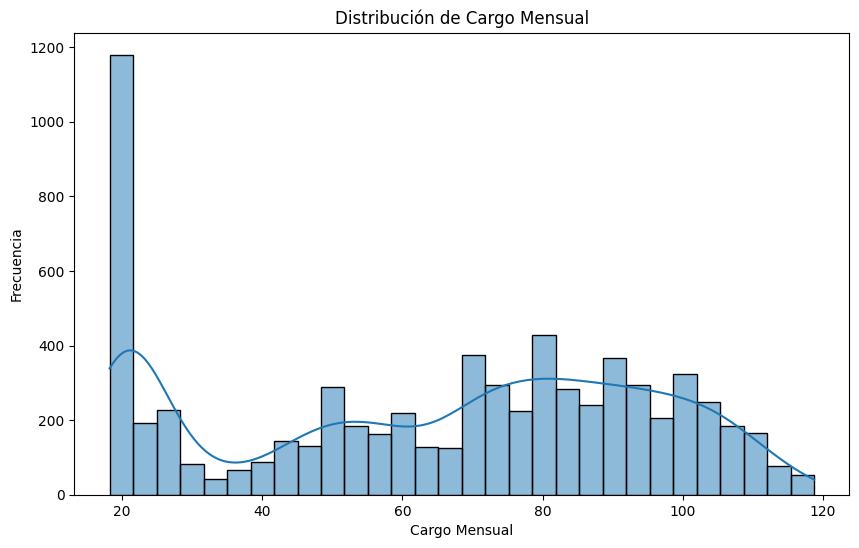

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['cargo_mensual'], bins=30, kde=True)
plt.title('Distribución de Cargo Mensual')
plt.xlabel('Cargo Mensual')
plt.ylabel('Frecuencia')
plt.show()

In [115]:


# Gráfico de dispersión: Cargo Mensual vs. Antigüedad
fig_scatter = px.scatter(df,
                         x='tiempo_contrato',           # Antigüedad (tiempo)
                         y='cargo_mensual',    # Dinero al mes
                         color='Churn',        # Color según si se fue o no
                         title='¿Influye el precio y el tiempo en que un cliente se vaya?',
                         labels={'tiempo_contrato': 'Meses en la empresa', 'cargo_mensual': 'Cargo Mensual'},
                         trendline="ols")      # Una línea mágica que nos dice la tendencia
fig_scatter.show()

In [116]:
px.histogram(df, x = 'cargo_total', text_auto = True, color = 'Churn', barmode = 'group')

In [117]:
px.scatter(df, x='tiempo_contrato', y='cargo_mensual', color='Churn')

In [118]:
px.violin(df, x='tipo_contrato', y='tiempo_contrato', color='Churn')

In [138]:
fig = px.histogram(df, x = 'tiempo_contrato', text_auto = True, color = 'Churn', barmode = 'group')
fig.update_layout(
    xaxis_showgrid=False,
    yaxis_showgrid=False
)
fig.show()

#📄Informe final